In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import datetime
import calendar
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("C:/Users/boyap/Desktop/Final Project/bookings.csv")

# Logistic regression

In [6]:
numerics = ['int16', 'int32', 'int64','float64']
non_numerics = ['object']

numerical_vars = df.select_dtypes(include=numerics).columns 
categorical_Vars = df.select_dtypes(include=non_numerics).columns
#Seperating numerical and categorical variables

In [7]:
unwanted = {'Booking_ID','booking_status'}
# I have choose keep rest of the features. 
 
numerical_list = [ele for ele in numerical_vars if ele not in unwanted]
categorical_list = [ele for ele in categorical_Vars if ele not in unwanted]

#Removing unwanted column and target variable from the lists and creating final numerical and cetegorical lists

In [8]:
#Printing out the final numerical and categorical lists
print("Numerical variables:",', '.join(numerical_list),'\n')
print("Categorical variables:",', '.join(categorical_list))

Numerical variables: no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests 

Categorical variables: type_of_meal_plan, room_type_reserved, market_segment_type


In [9]:
from sklearn.model_selection import train_test_split

#Deifining a splitting function with test to train sample ratio of 20:80% and a random state of 124 to ensure same results.
def generate_splits():
    y = df['booking_status']
    X = df[[x for x in df.columns if x != 'booking_status']]

    return train_test_split(X, y, test_size=0.2, random_state=124)

X_train, X_test, y_train, y_test = generate_splits()

#printing the size of train and test datasets
print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 29,020
Test examples: 7,255


In [10]:
#defining a numerical pipeline with standard scaler which standardizes the features of the data
num_pipeline = Pipeline([('standardize_num', StandardScaler())])

#defiing a categorical pipeline with one hot encoder which encodes the data into integer values
cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='error', drop='first'))])


#merging both numerical and categorical pipelines into one processing pipeline.
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_list),
                                                      ('create_dummies', cat_pipeline, categorical_list)])


#Creating a logistic regression pipeline which manages the data and also applies logistic regression classifier on the data
lr_pipeline = Pipeline([('data_processing', processing_pipeline),
                              ('pca', PCA(n_components=5)),
                              ('logreg', LogisticRegression(penalty='l2', max_iter = 1000))])
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [11]:
num_pipeline = Pipeline([('standardize_num', StandardScaler())])

cat_pipeline = Pipeline([('create_dummies_cats', OneHotEncoder(handle_unknown='error', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, numerical_list),
                                                      ('create_dummies', cat_pipeline, categorical_list)])

In [12]:
#Using gridsearchcv and fitting the data with training dataset
#Primary grid search
%timeit 

parameters = {'logreg__C':[0.01,1.0,5.0,10]} 

logistic_reg = GridSearchCV(lr_pipeline, param_grid = parameters, scoring='accuracy', cv = 5, refit = True, verbose = 10) 
logistic_reg = logistic_reg.fit(X_train, y_train)

logistic_reg.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... logreg__C=0.01, score=0.747, total=   0.5s
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...................... logreg__C=0.01, score=0.757, total=   0.6s
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ...................... logreg__C=0.01, score=0.772, total=   0.7s
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] ...................... logreg__C=0.01, score=0.760, total=   1.0s
[CV] logreg__C=0.01 ..................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV] ...................... logreg__C=0.01, score=0.761, total=   0.7s
[CV] logreg__C=1.0 ...................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s


[CV] ....................... logreg__C=1.0, score=0.758, total=   0.9s
[CV] logreg__C=1.0 ...................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.4s remaining:    0.0s


[CV] ....................... logreg__C=1.0, score=0.764, total=   0.5s
[CV] logreg__C=1.0 ...................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.9s remaining:    0.0s


[CV] ....................... logreg__C=1.0, score=0.774, total=   0.6s
[CV] logreg__C=1.0 ...................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.5s remaining:    0.0s


[CV] ....................... logreg__C=1.0, score=0.762, total=   0.5s
[CV] logreg__C=1.0 ...................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.0s remaining:    0.0s


[CV] ....................... logreg__C=1.0, score=0.769, total=   1.0s
[CV] logreg__C=5.0 ...................................................
[CV] ....................... logreg__C=5.0, score=0.759, total=   0.5s
[CV] logreg__C=5.0 ...................................................
[CV] ....................... logreg__C=5.0, score=0.764, total=   0.5s
[CV] logreg__C=5.0 ...................................................
[CV] ....................... logreg__C=5.0, score=0.774, total=   0.5s
[CV] logreg__C=5.0 ...................................................
[CV] ....................... logreg__C=5.0, score=0.763, total=   0.5s
[CV] logreg__C=5.0 ...................................................
[CV] ....................... logreg__C=5.0, score=0.769, total=   0.5s
[CV] logreg__C=10 ....................................................
[CV] ........................ logreg__C=10, score=0.758, total=   0.4s
[CV] logreg__C=10 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.0s finished


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [13]:
#Performing a secondary search with different parameter values
parameters = {'logreg__C':[10,12,15,16,20]} 

logistic_reg_2 = GridSearchCV(lr_pipeline, param_grid = parameters, scoring='accuracy', cv = 5, refit = True, verbose = 10) 
logistic_reg_2 = logistic_reg_2.fit(X_train, y_train)

logistic_reg_2.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] logreg__C=10 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................ logreg__C=10, score=0.758, total=   0.6s
[CV] logreg__C=10 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........................ logreg__C=10, score=0.764, total=   0.6s
[CV] logreg__C=10 ....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ........................ logreg__C=10, score=0.774, total=   0.5s
[CV] logreg__C=10 ....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] ........................ logreg__C=10, score=0.763, total=   0.5s
[CV] logreg__C=10 ....................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV] ........................ logreg__C=10, score=0.769, total=   0.4s
[CV] logreg__C=12 ....................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s


[CV] ........................ logreg__C=12, score=0.758, total=   0.5s
[CV] logreg__C=12 ....................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s


[CV] ........................ logreg__C=12, score=0.764, total=   0.6s
[CV] logreg__C=12 ....................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.8s remaining:    0.0s


[CV] ........................ logreg__C=12, score=0.774, total=   0.6s
[CV] logreg__C=12 ....................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.4s remaining:    0.0s


[CV] ........................ logreg__C=12, score=0.763, total=   0.5s
[CV] logreg__C=12 ....................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.9s remaining:    0.0s


[CV] ........................ logreg__C=12, score=0.769, total=   0.5s
[CV] logreg__C=15 ....................................................
[CV] ........................ logreg__C=15, score=0.758, total=   0.7s
[CV] logreg__C=15 ....................................................
[CV] ........................ logreg__C=15, score=0.764, total=   0.6s
[CV] logreg__C=15 ....................................................
[CV] ........................ logreg__C=15, score=0.774, total=   0.5s
[CV] logreg__C=15 ....................................................
[CV] ........................ logreg__C=15, score=0.763, total=   0.6s
[CV] logreg__C=15 ....................................................
[CV] ........................ logreg__C=15, score=0.769, total=   0.7s
[CV] logreg__C=16 ....................................................
[CV] ........................ logreg__C=16, score=0.758, total=   0.6s
[CV] logreg__C=16 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   15.3s finished


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [14]:
#obtianing a classification report using predicted values
y_hat = logistic_reg_2.predict(X_test)
    
print(classification_report(y_test, y_hat))
#Logistic Regression model with 77% accuracy

              precision    recall  f1-score   support

    Canceled       0.72      0.50      0.59      2395
Not_Canceled       0.79      0.90      0.84      4860

    accuracy                           0.77      7255
   macro avg       0.75      0.70      0.71      7255
weighted avg       0.76      0.77      0.76      7255



In [15]:
print("The score of this logistic regression model is :",logistic_reg_2.score(X_test, y_test))

The score of this logistic regression model is : 0.7691247415575465


In [16]:
print(confusion_matrix(y_test, y_hat))

[[1195 1200]
 [ 475 4385]]


This model has pipeline which pre-processes the data using standard scaler and one hot encoder. It then applies logistic regression classifier on the data and also has two levels of hyperparameter searching done using GridSearchCV. This model has an accuracy of 0.77. The accuracy might seem desirable but still can get better. The precision, recall and f1-score values are higher while predicting "Not_Canceled" but very low while predicting "Canceled". This model is incomplete and should not be used unless there is no other alternative.

# Decision Tree

In [23]:
#Deinfing a pipeine whihc used the previos preporcessing pipeline and decision tree classifier
modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

#defining parameters for the grid search
#this is the primary grid sarch
param_grid = [
  {'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None, 'balanced']
  }
 ]

dt_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)
dt_results = dt_results.fit(X_train, y_train)

#best_estimator_ gives the best estimator choosen by the search.
dt_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [24]:
#secondary grid search with updates values
param_grid = [
  {'dt__max_depth': [15, 16, 19, 20, 25],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [5, 10],
   'dt__class_weight':[None, 'balanced']
  }
 ]

dt_results_2 = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)
dt_results_2 = dt_results_2.fit(X_train, y_train)

dt_results_2.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

This estimator is better than the last one. The parameters from the secondary grid search are final.

In [25]:
#obtianing a classification report using predicted values
y_testp = dt_results_2.predict(X_test)

print(classification_report(y_test, y_testp))
#Decision tree classifier with an accuracy of 0.88

              precision    recall  f1-score   support

    Canceled       0.82      0.80      0.81      2395
Not_Canceled       0.90      0.91      0.91      4860

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



In [26]:
print(confusion_matrix(y_test, y_testp))

[[1921  474]
 [ 435 4425]]


This model has pipeline which pre-processes the data using standard scaler and one hot encoder. It then applies decision tree classifier on the data and also has two levels of hyperparameter searching done using GridSearchCV. This model has an accuracy of 88%. This model also has good precision recall and f-score values while prediciting both 'canceled' and 'not_canceled' values but its ability to correctly predict "not_canceled" values is higher than to predict "canceled" . This is better than the logistic regression conducted before in terms of accuracy, precision and recall values. The run time of this classifier is also pretty low compared to other models like Random forest and Grdient boosting classifiers. The "dt_results_2" is the final model with the best estimator.

# ROC-AUC Curve

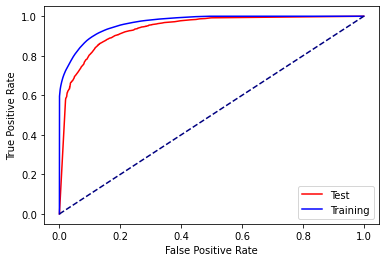

In [27]:
from sklearn.metrics import roc_curve

def generate_probs_2(X, model=dt_results_2):
    return model.predict_proba(X)[:, 1]

def generate_roc_2(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
 
y_test_ROC = y_test.map({'Canceled':0, 'Not_Canceled':1}).astype(int)
y_train_ROC = y_train.map({'Canceled':0, 'Not_Canceled':1}).astype(int)

fpr_test, tpr_test = generate_roc_2(y_test_ROC, generate_probs_2(X_test))
fpr_train, tpr_train = generate_roc_2(y_train_ROC, generate_probs_2(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [28]:
print("The ROC-AOC score of this model is",roc_auc_score(y_test, generate_probs_2(X_test)))

The ROC-AOC score of this model is 0.9364347448817409


This model also has better ROC-AOC score than the first model. Which means that the model is better equipped to identify and seperate the two classes. This model can be viable if the accuracy does not increase in the futher models.

In [31]:
#Creating a random forest pipeline with data processing pipeline from the previous steps and using rendom forest classifier.
rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

#choosing parameters for hyper parameter searching
#this is primary serach
param_grid = [{'rf__max_depth': [5, 8, 10, 12],
               'rf__n_estimators': [10, 50, 100],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='accuracy', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

#getting the best estimator
rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [32]:
#definind the parameters for secondary hyperparameter searching
param_grid = [{'rf__max_depth': [12, 13, 17, 20],
               'rf__n_estimators': [50, 100, 120],
               'rf__class_weight': [None, 'balanced', 'balanced_subsample'],
               'rf__max_samples': [5000, 7000, 9000]
              }]

rf_results_2 = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='accuracy', refit=True)
rf_results_2 = rf_results_2.fit(X_train, y_train)

#getting the best estimator for the secondary grid search
rf_results_2.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [33]:
#predicting using the best random forest model
rf_yhat = rf_results_2.predict(X_test)

print(classification_report(y_test, rf_yhat))

              precision    recall  f1-score   support

    Canceled       0.86      0.82      0.84      2395
Not_Canceled       0.91      0.93      0.92      4860

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.89      0.90      0.89      7255



In [34]:
print(confusion_matrix(y_test, rf_yhat))

[[1953  442]
 [ 319 4541]]


This model has an accuracy of 90%. The precision, recall and f1 values of the model are pretty good as well. Though these values are greater while prediting "Not-canceled" just like all the other models, the values while predicting "Canceled" are good as well. This model has the highest accuracy of the three models that are analysed until now. This model is chosen after tuning the hyperparameter search with secondary grid search technique to create the best model. Considering that this model took same amount of time to run as the decision tree model, this model is dar supirior with higher accuracy.

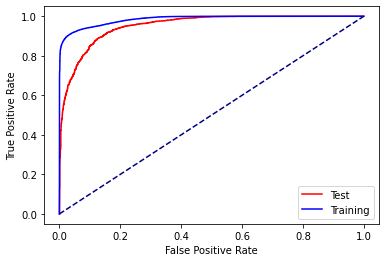

In [35]:
#getting the ROC curve
def generate_probs_3(X, model=rf_results_2):
    return model.predict_proba(X)[:, 1]

def generate_roc_3(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
 
y_test_ROC = y_test.map({'Canceled':0, 'Not_Canceled':1}).astype(int)
y_train_ROC = y_train.map({'Canceled':0, 'Not_Canceled':1}).astype(int)

fpr_test, tpr_test = generate_roc_3(y_test_ROC, generate_probs_3(X_test))
fpr_train, tpr_train = generate_roc_3(y_train_ROC, generate_probs_3(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [36]:
print("The ROC-AUC score of this model is",roc_auc_score(y_test, generate_probs_3(X_test)))

The ROC-AUC score of this model is 0.9519271115234929


This model has better ROC curve as well. Compared to the previous model's ROC score of 0.93, this model has better ROC score with 0.95. This means that this model can differentiate well between the two classes. Hence this model is by far the better model of all.

# Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

#creating a pipeline that consists of data processing pipeline that was assigned before and a gradient boosting classifier.
gb_pipeline = Pipeline([('data_processing', processing_pipeline),
                        ('gbc', GradientBoostingClassifier())])


#Defining the parameters for grid search
params = [{'gbc__max_depth': [5, 8, 20],
               'gbc__n_estimators': [50, 70, 100]
              }]

gb_results = GridSearchCV(gb_pipeline,
                         param_grid = params, cv = 5,
                         scoring = 'accuracy', verbose = 10)

gb_results = gb_results.fit(X_train, y_train)

#Finding the best estimator
gb_results.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] gbc__max_depth=5, gbc__n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gbc__max_depth=5, gbc__n_estimators=50, score=0.869, total=   5.3s
[CV] gbc__max_depth=5, gbc__n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=50, score=0.875, total=   4.8s
[CV] gbc__max_depth=5, gbc__n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.0s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=50, score=0.873, total=   4.9s
[CV] gbc__max_depth=5, gbc__n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.9s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=50, score=0.865, total=   4.9s
[CV] gbc__max_depth=5, gbc__n_estimators=50 ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.9s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=50, score=0.866, total=   4.4s
[CV] gbc__max_depth=5, gbc__n_estimators=70 ..........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.3s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=70, score=0.873, total=   6.2s
[CV] gbc__max_depth=5, gbc__n_estimators=70 ..........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   30.5s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=70, score=0.882, total=   5.9s
[CV] gbc__max_depth=5, gbc__n_estimators=70 ..........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   36.5s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=70, score=0.876, total=   5.1s
[CV] gbc__max_depth=5, gbc__n_estimators=70 ..........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   41.6s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=70, score=0.870, total=   5.5s
[CV] gbc__max_depth=5, gbc__n_estimators=70 ..........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   47.1s remaining:    0.0s


[CV]  gbc__max_depth=5, gbc__n_estimators=70, score=0.870, total=   5.1s
[CV] gbc__max_depth=5, gbc__n_estimators=100 .........................
[CV]  gbc__max_depth=5, gbc__n_estimators=100, score=0.877, total=   7.3s
[CV] gbc__max_depth=5, gbc__n_estimators=100 .........................
[CV]  gbc__max_depth=5, gbc__n_estimators=100, score=0.886, total=   7.4s
[CV] gbc__max_depth=5, gbc__n_estimators=100 .........................
[CV]  gbc__max_depth=5, gbc__n_estimators=100, score=0.877, total=   7.8s
[CV] gbc__max_depth=5, gbc__n_estimators=100 .........................
[CV]  gbc__max_depth=5, gbc__n_estimators=100, score=0.875, total=   8.3s
[CV] gbc__max_depth=5, gbc__n_estimators=100 .........................
[CV]  gbc__max_depth=5, gbc__n_estimators=100, score=0.875, total=   7.4s
[CV] gbc__max_depth=8, gbc__n_estimators=50 ..........................
[CV]  gbc__max_depth=8, gbc__n_estimators=50, score=0.888, total=   5.7s
[CV] gbc__max_depth=8, gbc__n_estimators=50 ..............

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 16.0min finished


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [38]:
#Performing a secondary grid search for better results
params = [{'gbc__max_depth': [8, 10, 20],
               'gbc__n_estimators': [100, 120, 150]
              }]

gb_results_2 = GridSearchCV(gb_pipeline,
                         param_grid = params, cv = 5,
                         scoring = 'accuracy', verbose = 10)

gb_results_2 = gb_results_2.fit(X_train, y_train)

#Finding the best estimator
gb_results_2.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] gbc__max_depth=8, gbc__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gbc__max_depth=8, gbc__n_estimators=100, score=0.895, total=  15.7s
[CV] gbc__max_depth=8, gbc__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=100, score=0.899, total=  13.7s
[CV] gbc__max_depth=8, gbc__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   29.3s remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=100, score=0.893, total=  14.5s
[CV] gbc__max_depth=8, gbc__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   43.7s remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=100, score=0.895, total=  16.3s
[CV] gbc__max_depth=8, gbc__n_estimators=100 .........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=100, score=0.890, total=  15.6s
[CV] gbc__max_depth=8, gbc__n_estimators=120 .........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=120, score=0.893, total=  20.6s
[CV] gbc__max_depth=8, gbc__n_estimators=120 .........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.6min remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=120, score=0.905, total=  18.0s
[CV] gbc__max_depth=8, gbc__n_estimators=120 .........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.9min remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=120, score=0.895, total=  18.1s
[CV] gbc__max_depth=8, gbc__n_estimators=120 .........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.2min remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=120, score=0.893, total=  18.9s
[CV] gbc__max_depth=8, gbc__n_estimators=120 .........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.5min remaining:    0.0s


[CV]  gbc__max_depth=8, gbc__n_estimators=120, score=0.893, total=  17.2s
[CV] gbc__max_depth=8, gbc__n_estimators=150 .........................
[CV]  gbc__max_depth=8, gbc__n_estimators=150, score=0.894, total=  19.4s
[CV] gbc__max_depth=8, gbc__n_estimators=150 .........................
[CV]  gbc__max_depth=8, gbc__n_estimators=150, score=0.903, total=  19.5s
[CV] gbc__max_depth=8, gbc__n_estimators=150 .........................
[CV]  gbc__max_depth=8, gbc__n_estimators=150, score=0.900, total=  20.7s
[CV] gbc__max_depth=8, gbc__n_estimators=150 .........................
[CV]  gbc__max_depth=8, gbc__n_estimators=150, score=0.895, total=  21.6s
[CV] gbc__max_depth=8, gbc__n_estimators=150 .........................
[CV]  gbc__max_depth=8, gbc__n_estimators=150, score=0.890, total=  21.1s
[CV] gbc__max_depth=10, gbc__n_estimators=100 ........................
[CV]  gbc__max_depth=10, gbc__n_estimators=100, score=0.899, total=  19.7s
[CV] gbc__max_depth=10, gbc__n_estimators=100 .........

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 30.5min finished


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('standardize_num',
                                                                   StandardScaler())]),
                                                  ['no_of_adults',
                                                   'no_of_children',
                                                   'no_of_weekend_nights',
                                                   'no_of_week_nights',
                                                   'required_car_parking_space',
                                                   'lead_time', 'arrival_year',
                                                   'arrival_month',
                                                   'arrival_date',
                                                   'repeated_guest',
                                                   'no_of_previous_cancellat

In [39]:
gb_yhat = gb_results_2.predict(X_test)

print(classification_report(y_test, gb_yhat))

              precision    recall  f1-score   support

    Canceled       0.87      0.81      0.84      2395
Not_Canceled       0.91      0.94      0.92      4860

    accuracy                           0.90      7255
   macro avg       0.89      0.88      0.88      7255
weighted avg       0.90      0.90      0.90      7255



In [40]:
print(confusion_matrix(y_test, gb_yhat))

[[1942  453]
 [ 295 4565]]


This model got an accuracy of 90%. This is a pretty good score for this model. The precision, recall and f1-score values are good as well. Compared to the current best model, Random forest, this model took around 15 minutes to run, for a dataset of this size, this model takes huge computational power to execute, which is not desirable unless it has a very high accuracy or precision values.

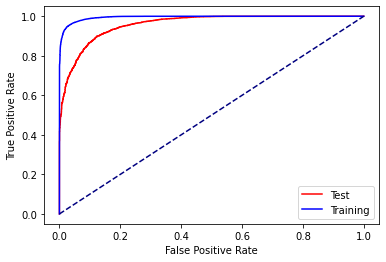

In [41]:
from sklearn.metrics import roc_curve

def generate_probs_4(X, model=gb_results_2):
    return model.predict_proba(X)[:, 1]

def generate_roc_4(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
 
y_test_ROC = y_test.map({'Canceled':0, 'Not_Canceled':1}).astype(int)
y_train_ROC = y_train.map({'Canceled':0, 'Not_Canceled':1}).astype(int)

fpr_test, tpr_test = generate_roc_4(y_test_ROC, generate_probs_4(X_test))
fpr_train, tpr_train = generate_roc_4(y_train_ROC, generate_probs_4(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [42]:
print("The ROC-AUC score of this model is",roc_auc_score(y_test, generate_probs_4(X_test)))

The ROC-AUC score of this model is 0.9587292198252533


The ROC score of this model is 0.95 which is similar to that of random forest. Due to the computational effort to run this model and the similar accuracy wiht the less demanding random forest classifier, this model is not prefered for this usecase.